# **Final Project: Monet Paintings to Photos using CycleGAN**




- For this project, I decided to take on Generative Adversarial Networks (GAN). GANs achieve a level of realism using two neural networks by pairing a generator and a discriminator and making it go against each other in order to generate new, synthetic instances of data that can pass for real data. 
- The generator learns to produce the target output with a discriminator. 
- The discriminator learns to distinguish true data from the output of the generator. 
- The generator tries to fool the discriminator, but the discriminator is wise, it keeps itself from being fooled by the generator. 
- An example of this is the use of "Deepfakes." Deepfake is a person in an existing image or video that is replaced with someone else by altering their faces.

## Objective:
- There are many different types of GANs; my choice was CycleGAN.
- The CycleGAN project [here](https://www.tensorflow.org/tutorials/generative/cyclegan) uses a dataset called **horses2zebras**, which trains a model to translate images of horses, to images of zebras. Instead I will be using a different dataset called **monet2photo** using Monet paintings to generate them into photos.

- I will also train the model with a larger number of epochs to improve the results.

## What is CycleGAN?
-  CycleGAM is a technique that involves the automatic training of image-to-image translation models without paired examples. The models are trained in an unsupervised manner using a collection of images from two different domains (`the source and target`) and do not need to be related in any way.
- CycleGAN has been demonstrated on a range of applications including season translation, object transfiguration, style transfer, and generating photos from paintings.



- **Image-to-Image translation** involves the controlled modification of an image and requires large datasets of paired images that are complex to prepare or sometimes don’t exist.
      Examples of image-to-image translation include:
      - Translating summer landscapes to winter landscapes (or the reverse).
      - Translating paintings to photographs (or the reverse).
      - Translating horses to zebras (or the reverse).

[Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks](https://arxiv.org/abs/1703.10593)

"In many style transfer applications, paired data is required for the training."

![Paired](https://miro.medium.com/max/896/1*Ivl37QN8QOmeZTyER4L2SA.png)

**CycleGAN** doesn't required paired data input to train a model.

![Unpaired](https://miro.medium.com/max/1124/1*5vmEbLdK0se_lqqpHJV3Vw.png)

## Pix2Pix & CycleGan

- The approach used by CycleGANs to perform Image to Image Translation is  similar to Pix2Pix GAN, the main difference is an additional loss function, and the use of unpaired training data. 
- Instead of taking in as input a fixed-size vector, it takes an image from one domain as input and outputs the corresponding image in the other domain.

"CycleGAN uses a cycle consistency loss to enable training without the need for paired data. In other words, it can translate from one domain to another without a one-to-one mapping between the source and target domain. This opens up the possibility to do a lot of interesting tasks like photo-enhancement, image colorization, style transfer, etc. All you need is the source and the target dataset (which is simply a directory of images." 

Source: https://www.tensorflow.org/tutorials/generative/cyclegan

### Example output image of Monet Paintings to Photos

![Example](https://drive.google.com/uc?id=1Q7tQsKMDw93J0kdGdgQEoqO6-dxgxYED)

![Example2](https://drive.google.com/uc?id=1D27DXVYxqdTilm7G1RjQhSnDatQaaBWo)

![Example3](https://drive.google.com/uc?id=1BPE33yYiL5-hIhK6c_HjHczvh0f_fdO1)

## Set up the input pipeline

Install the [tensorflow_examples](https://github.com/tensorflow/examples) package that enables importing of the generator and the discriminator.

In [1]:
!pip install git+https://github.com/tensorflow/examples.git

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-1uok6hvb
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-1uok6hvb
  Created wheel for tensorflow-examples: filename=tensorflow_examples-209a68e7182c40fc16e5ed963d82d17a5ac9f9c4_-cp36-none-any.whl size=128633 sha256=408e62386717fd2308e15e335ee79edaf6d007a0517af2dd651621240cac77f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-iee9ojzf/wheels/83/64/b3/4cfa02dc6f9d16bf7257892c6a7ec602cd7e0ff6ec4d7d714d
Successfully built tensorflow-examples


In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
import tensorflow_datasets as tfds
from tensorflow_examples.models.pix2pix import pix2pix

import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

tfds.disable_progress_bar()
# Tensorflow datasets generates a lot of progress bars and take up a lot of screen space. Therefore, it is useful to use this function.
AUTOTUNE = tf.data.experimental.AUTOTUNE
# This function dynamically determines the right number for you instead of assigning numbers manually.

## 3 essential steps to train GAN

1.   The discriminator is shown a batch of real images and its weights optimized to classify these images as real images
2.  We generate a batch of fake images using the generator, show these fake images to the discriminator and then optimize the weights of the discriminator to classify these images as fake images.
3. Lastly, we train the generator by generating a batch of fake images, show these fake images to the discriminator but instead of optimizing the discriminator to classify these images as fake images, we optimize the generator to force the discriminator to classify these fakes images as real images.

## Input Pipeline

This tutorial trains a model to translate from images of paintings by the Artist Monet, to photos of landscapes and outdoor scenery. You can find this dataset and similar ones [here](https://www.tensorflow.org/datasets/datasets#cycle_gan). 

As mentioned in the [paper](https://arxiv.org/abs/1703.10593), apply random jittering and mirroring to the training dataset. These are some of the image augmentation techniques that avoids overfitting.

This is similar to what was done in [pix2pix](https://www.tensorflow.org/tutorials/generative/pix2pix#load_the_dataset)

* In random jittering, the image is resized to `286 x 286` and then randomly cropped to `256 x 256`.
* In random mirroring, the image is randomly flipped horizontally i.e left to right.

In [4]:
# Load the dataset
dataset, metadata = tfds.load('cycle_gan/monet2photo',
                              with_info=True, as_supervised=True)

# the dataset is divided into train & test
train_monet, train_photo = dataset['trainA'], dataset['trainB']
test_monet, test_photo = dataset['testA'], dataset['testB']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cycle_gan/monet2photo/2.0.0.incompleteD03DQ6/cycle_gan-trainA.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/cycle_gan/monet2photo/2.0.0.incompleteD03DQ6/cycle_gan-trainB.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/cycle_gan/monet2photo/2.0.0.incompleteD03DQ6/cycle_gan-testA.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/cycle_gan/monet2photo/2.0.0.incompleteD03DQ6/cycle_gan-testB.tfrecord
Dataset cycle_gan downloaded and prepared to /root/tensorflow_datasets/cycle_gan/monet2photo/2.0.0. Subsequent calls will reuse this data.


In [0]:
# Image size is 256
IMG_WIDTH = 256
IMG_HEIGHT = 256


def random_crop(image):
  cropped_image = tf.image.random_crop(
      image, size=[IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image

In [0]:
# GAN generator models outputs pixel values with the shape as the input and pixel values are in the range [-1, 1]

# normalizing the images to [-1, 1] 
def normalize(image):
  image = tf.cast(image, tf.float32)
  # scale pixels from [0,255] to [-1,1]
  image = (image / 127.5) - 1
  return image

In [0]:
def random_jitter(image):
  # resizing to 286 x 286 x 3
  image = tf.image.resize(image, [286, 286],
                          method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  
  # image_resize() is performing an interpolation between adjacent pixels, and returning floats instead of integers in the range 0-255. 
  # NEAREST_NEIGHBOR takes the value of one of the near pixels without doing further math.

  # randomly cropping to 256 x 256 x 3
  image = random_crop(image)

  # random mirroring
  image = tf.image.random_flip_left_right(image)

  return image

## Preprocessing

In [0]:
def preprocess_image_train(image, label):
  image = random_jitter(image)
  image = normalize(image)
  return image

In [0]:
def preprocess_image_test(image, label):
  image = normalize(image)
  return image

In [0]:
BUFFER_SIZE = 1000
BATCH_SIZE = 1

train_monet = train_monet.map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

train_photo = train_photo.map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

test_monet = test_monet.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

test_photo = test_photo.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

- **The above code defines a set of functions to manipulate images as they flow through the pipeline which  is referred to as data augmentation.**





In [0]:
sample_monet = next(iter(train_monet))
sample_photo = next(iter(train_photo))


- **The dataset is batched and the images are shuffled after each complete iteration through the dataset.**





## Visualization

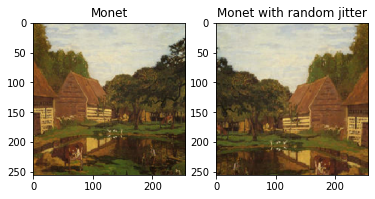

In [12]:
plt.subplot(121)
plt.title('Monet')
plt.imshow(sample_monet[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Monet with random jitter')
plt.imshow(random_jitter(sample_monet[0]) * 0.5 + 0.5)

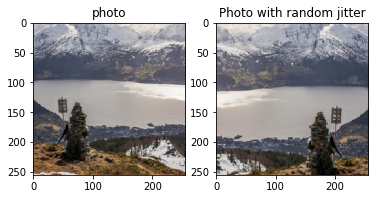

In [13]:
plt.subplot(121)
plt.title('photo')
plt.imshow(sample_photo[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Photo with random jitter')
plt.imshow(random_jitter(sample_photo[0]) * 0.5 + 0.5)

## Import and reuse the Pix2Pix models

Import the generator and the discriminator used in [Pix2Pix](https://github.com/tensorflow/examples/blob/master/tensorflow_examples/models/pix2pix/pix2pix.py) via the installed [tensorflow_examples](https://github.com/tensorflow/examples) package.

The model architecture used in this tutorial is very similar to what was used in [pix2pix](https://github.com/tensorflow/examples/blob/master/tensorflow_examples/models/pix2pix/pix2pix.py). Some of the differences are:

* Cyclegan uses [instance normalization](https://arxiv.org/abs/1607.08022) instead of [batch normalization](https://arxiv.org/abs/1502.03167).
* The [CycleGAN paper](https://arxiv.org/abs/1703.10593) uses a modified `resnet` based generator. This tutorial is using a modified `unet` generator for simplicity.

There are 2 generators (G and F) and 2 discriminators (X and Y) being trained here. 

* Generator `G` learns to transform image `X` to image `Y`. $(G: X -> Y)$
* Generator `F` learns to transform image `Y` to image `X`. $(F: Y -> X)$
* Discriminator `D_X` learns to differentiate between image `X` and generated image `X` (`F(Y)`).
* Discriminator `D_Y` learns to differentiate between image `Y` and generated image `Y` (`G(X)`).

![Cyclegan model](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/cyclegan_model.png?raw=1)

## Normalization

In [0]:
OUTPUT_CHANNELS = 3

gen_g = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')
gen_f = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')

disc_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
disc_y = pix2pix.discriminator(norm_type='instancenorm', target=False)

### **encoder-decoder vs U-Net**

### encoder-decoder: the structure of the generator 

![encoder-decoder](https://miro.medium.com/max/1400/1*grPpbT-8fwA4twYZkAHwmw.png)

- **In order to improve the performance of the image-to-image transform “U-Net” is preferrable instead of an encoder-decoder. This is the same thing, but with “skip connections” directly connecting encoder layers to decoder layers:**

### U-Net

![skip connections](https://miro.medium.com/max/1400/1*kpWvVdQOmbMuX2ls-d78TA.png)


- **Instance normalization layer is applied at test time. It is similar to layer normalization but instead of normalizing all of the features of an example at once, instance norm normalizes features within each channel.**


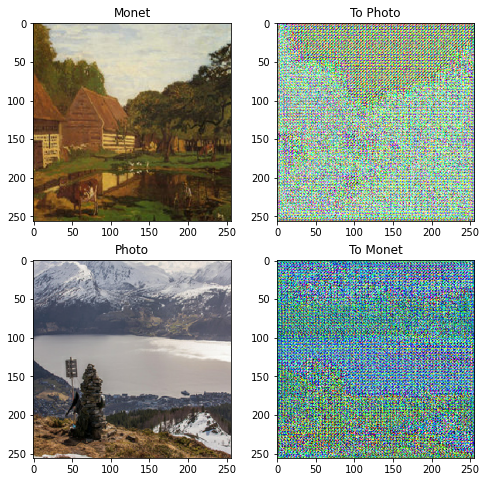

In [15]:
# Preparing image translation
to_photo = gen_g(sample_monet)
to_monet = gen_f(sample_photo)
plt.figure(figsize=(8, 8))
contrast = 8

imgs = [sample_monet, to_photo, sample_photo, to_monet]
title = ['Monet', 'To Photo', 'Photo', 'To Monet']

for i in range(len(imgs)):
  plt.subplot(2, 2, i+1)
  plt.title(title[i])
  if i % 2 == 0:
    plt.imshow(imgs[i][0] * 0.5 + 0.5)
  else:
    plt.imshow(imgs[i][0] * 0.5 * contrast + 0.5)
plt.show()

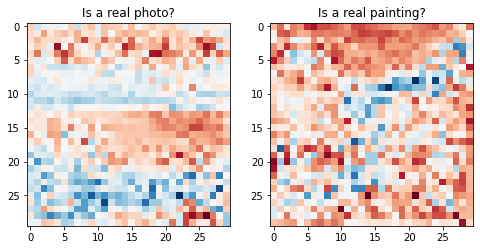

In [16]:
plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.title('Is a real photo?')
plt.imshow(disc_y(sample_photo)[0, ..., -1], cmap='RdBu_r')

plt.subplot(122)
plt.title('Is a real painting?')
plt.imshow(disc_x(sample_monet)[0, ..., -1], cmap='RdBu_r')

plt.show()

## Loss functions

In CycleGAN, there is no paired data to train on, hence there is no guarantee that the input `x` and the target `y` pair are meaningful during training. Thus in order to enforce that the network learns the correct mapping, the authors propose the cycle consistency loss.

The discriminator loss and the generator loss are similar to the ones used in [pix2pix](https://www.tensorflow.org/tutorials/generative/pix2pix#define_the_loss_functions_and_the_optimizer).

In [0]:
LAMBDA = 10

In [0]:
# Objective function

loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)
# using a binary cross-entropy loss function instead of a mean absolute error

def discriminator_loss(real, generated):
  real_loss = loss_obj(tf.ones_like(real), real)
  # real loss objective takes as input the discriminator output when a real image is fed into the discriminator and a matrix of ones.
  generated_loss = loss_obj(tf.zeros_like(generated), generated)
  # increasing the probability of the discriminator predicting a value close to zero when we feed in a fake image produced by the generator into the discriminator.
  total_disc_loss = real_loss + generated_loss
  # We add both losses to back-propagate and train the discriminator. 

  return total_disc_loss * 0.5

In [0]:
# Alter the generator to force the discriminator to predict a value close to one.

def generator_loss(generated):
  return loss_obj(tf.ones_like(generated), generated)

Cycle consistency means the result should be close to the original input. For example, if one translates a sentence from English to French, and then translates it back from French to English, then the resulting sentence should be the same as the  original sentence.

In cycle consistency loss, 

* Image $X$ is passed via generator $G$ that yields generated image $\hat{Y}$.
* Generated image $\hat{Y}$ is passed via generator $F$ that yields cycled image $\hat{X}$.
* Mean absolute error is calculated between $X$ and $\hat{X}$.

$$forward\ cycle\ consistency\ loss: X -> G(X) -> F(G(X)) \sim \hat{X}$$

$$backward\ cycle\ consistency\ loss: Y -> F(Y) -> G(F(Y)) \sim \hat{Y}$$


![Cycle loss](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/cycle_loss.png?raw=1)

In [0]:
def calc_cycle_loss(real_image, cycled_image):
  loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))
  
  return LAMBDA * loss1
  # LAMBDA is to provide weight to this objective function

As shown above, generator $G$ is responsible for translating image $X$ to image $Y$. Identity loss says that, if you fed image $Y$ to generator $G$, it should yield the real image $Y$ or something close to image $Y$.

$$Identity\ loss = |G(Y) - Y| + |F(X) - X|$$

In [0]:
def identity_loss(real_image, same_image):
  loss = tf.reduce_mean(tf.abs(real_image - same_image))
  
  return LAMBDA * 0.5 * loss

## Optimizers

**Initialize the optimizers for all the generators and the discriminators.**

In [0]:
gen_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
gen_f_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

disc_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
disc_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

- **Adam optimization** is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. It is a popular algorithm in the field of deep learning because it achieves good results fast.

## Checkpoints

In [0]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(gen_g=gen_g, gen_f=gen_f,
                           disc_x=disc_x, disc_y=disc_y,
                           gen_g_optimizer=gen_g_optimizer,
                           gen_f_optimizer=gen_f_optimizer,
                           disc_x_optimizer=disc_x_optimizer,
                           disc_y_optimizer=disc_y_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')

- **tf.train.Checkpoint** groups trackable objects, saving and restoring them.

## Training the model

In [0]:
EPOCHS = 100

- Using fewer epochs (100) than the actual [paper](https://arxiv.org/abs/1703.10593) (200) to keep training time reasonable. 
- Predictions may still be accurate. 

In [0]:
def generate_images(model, test_input):
  prediction = model(test_input)
    
  plt.figure(figsize=(12, 12))

  display_list = [test_input[0], prediction[0]]
  title = ['Input Image', 'Predicted Image']

  for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

Even though the training loop looks complicated, it consists of four basic steps:

* Get the predictions.
* Calculate the loss.
* Calculate the gradients using backpropagation.
* Apply the gradients to the optimizer.

In [0]:
@tf.function
def train_step(real_x, real_y):
  # persistent is set to True because the tape is used more than
  # once to calculate the gradients.
  with tf.GradientTape(persistent=True) as tape: 
    # tf.GradientTape records operations for automatic differentiation.
    # Generator G translates X -> Y
    # Generator F translates Y -> X.
    
    # Train **Generators**
    # generate fake X images, reconstructed Y images
    fake_y = gen_g(real_x, training=True)
    cycled_x = gen_f(fake_y, training=True)

    fake_x = gen_f(real_y, training=True)
    cycled_y = gen_g(fake_x, training=True)

    # same_x and same_y are used for identity loss.
    same_x = gen_f(real_x, training=True)
    same_y = gen_g(real_y, training=True)

    # Train **Discriminators**
    disc_real_x = disc_x(real_x, training=True)
    disc_real_y = disc_y(real_y, training=True)

    disc_fake_x = disc_x(fake_x, training=True)
    disc_fake_y = disc_y(fake_y, training=True)

    # Calculate the loss
    gen_g_loss = generator_loss(disc_fake_y)
    gen_f_loss = generator_loss(disc_fake_x)

    total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)
    
    # Total generator loss = adversarial loss + cycle loss
    total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
    total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)

    # Real and fake loss components
    disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
    disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)
  
  # Calculate the gradients for generator and discriminator
  gen_g_gradients = tape.gradient(total_gen_g_loss, gen_g.trainable_variables)
  gen_f_gradients = tape.gradient(total_gen_f_loss, gen_f.trainable_variables)
  
  disc_x_gradients = tape.gradient(disc_x_loss, disc_x.trainable_variables)
  disc_y_gradients = tape.gradient(disc_y_loss, disc_y.trainable_variables)
  
  # Apply the gradients to the optimizer
  gen_g_optimizer.apply_gradients(zip(gen_g_gradients, gen_g.trainable_variables))
  gen_f_optimizer.apply_gradients(zip(gen_f_gradients, gen_f.trainable_variables))
  disc_x_optimizer.apply_gradients(zip(disc_x_gradients,disc_x.trainable_variables))
  disc_y_optimizer.apply_gradients(zip(disc_y_gradients,disc_y.trainable_variables))

In [27]:
for epoch in range(EPOCHS):
  start = time.time()

  n = 0
  for image_x, image_y in tf.data.Dataset.zip((train_monet, train_photo)):
    train_step(image_x, image_y)
    if n % 10 == 0:
      print ('.', end='')
    n+=1

  clear_output(wait=True)
  # Using a consistent image (sample_monet) so that the progress of the model
  # is clearly visible.
  generate_images(gen_g, sample_monet)

  if (epoch + 1) % 5 == 0:
    ckpt_save_path = ckpt_manager.save()
    print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))

  print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                      time.time()-start))

Buffered data was truncated after reaching the output size limit.

## Generate using test dataset

In [54]:
# Run the trained model on the test dataset
for inp in test_monet.take(50):
  generate_images(gen_g, inp)

Output hidden; open in https://colab.research.google.com to view.

## In conclusion:

- As you increase the number of epochs, the results will be more accurate. The only downfall is that it takes a lot of runtime. It can take up to 10 hours or more to train the entire dataset with a larger number of epochs. 

- You can see that in many predicted sets of monet paintings to photos, there are some differences in the shades or hue in colors, texture, and constrast while the saturation might look the same. 

There are many other ways that you can utilize CycleGANs.

Examples:
- Painting to photo (as we saw here).
- Real photo to an artist’s painting.
- Summer scenes converted into wintry ones, and vice versa.
- A video taken during the day converted into a nighttime one.
- Face image to emoji, caricature or anime.
- Body image to the avatar.
- Colorization of grayscale photos.
- Satellite image to map.
- Medical scan to a real photo.
- and many more!